# Investigating Fandango Movie Ratings

In October 2015, Walt Hickey analyzed Fandango's movie ratings data and found that Fandango was inflating movie ratings before presenting the ratings to users. The goal of this project is to analyze recent Fandango movie ratings to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## 1. Read in data

In [1]:
import pandas as pd

# read in Hickey's data from github
old_ratings = pd.read_csv("fandango_score_comparison.csv")

# read in movie rating data from 2016 and 2017
new_ratings = pd.read_csv("movie_ratings_16_17.csv")

## 2. Take a brief look at the data

In [2]:
old_ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
old_ratings.describe(include="all")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
unique,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Testament of Youth (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,NaN,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,NaN,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,NaN,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,NaN,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,NaN,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000


In [4]:
years = old_ratings["FILM"].apply(lambda x: x[-6:])
years.value_counts()

(2015)    129
(2014)     17
Name: FILM, dtype: int64

Hickey's dataset of old movie ratings contains movie ratings for 146 unique movies (from 2014 and 2015) from Rotten Tomatoes, Metacritic, IMDB, and Fandango. Since we're only interested in the Fandango information, we will subset to just those variables.

In [5]:
old_ratings = old_ratings[["FILM","Fandango_Stars",
                           "Fandango_Ratingvalue","Fandango_votes",
                           "Fandango_Difference"]]

In [6]:
new_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
new_ratings.describe(include="all")

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
unique,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Edge of Seventeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,NaN,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,NaN,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,NaN,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,NaN,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,NaN,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000


The newer movie dataset also contains multiple movie ratings (metscore, imdb, rotten tomatoes, and fandango) for 214 unique movies from 2016 and 2017.  Again, since we're only interested in the Fandango information, we will subset to just those variables.

In [8]:
new_ratings = new_ratings[["movie","year","fandango"]]

Note that our ideal study population for this problem would be a random sample of movies from Fandango from before and after Hickey's analysis that were reviewed enough times by users to have reliable scores.

The movies that are in Hickey's dataset were those that had a rating in Rotten Tomatoes, Maetacritic, and IMDb, and had at least 30 ratings on Fandango as of August 24, 2015. The movies that are in the new rating dataset are among the most popular movies which had a significant number of votes from 2016 and 2017, as of March 22, 2017.

The data we have is not ideal since likely Hickey's dataset contains either older movies that have been around long enough to get ratings or newer, more popular movies. Our two data samples may not be comparable since it's unclear how stringent the "significant number of votes" restriction is on the new rating dataset and how it compares to the 30 rating restriction on the old rating dataset.

## 3. Revising our goal

Since our data isn't good for our original purpose, we can relax our goal to instead compare these two old and new Fandango movie rating datasets to see how similar the distributions of the ratings are. In particular we can compare the popular movies ratings from 2015 (in the old rating dataset) to the popular movie ratings from 2016 (from the new rating dataset). We will define "popular" movies as those that had 30 or more ratings on Fandango.

In [10]:
# restrict data to popular movies

# As we saw above, all of the movies in the old rating dataset have
# Fandango votes >= 35, so they are all popular

# The new rating data does not contain the number of Fandango votes
# We can independently check whether or not a random sample of the 
# movies have >= 30 ratings on Fandango as of January 28, 2019

new_ratings.sample(10)

,movie,year,fandango
172,The Duel,2016,3.5
23,Bitter Harvest,2017,4.5
210,XX,2017,3.0
62,Ghostbusters,2016,4.0
14,Assassin's Creed,2016,4.0
205,War on Everyone,2016,4.0
63,Gods of Egypt,2016,3.5
212,Zoolander 2,2016,2.5
203,Underworld: Blood Wars,2016,4.0
49,Everybody Wants Some!!,2016,3.5


In [14]:
# Fandango website results:

# The Duel: 8 fan ratings
# Bitter Harvest: 123 fan ratings
# XX: 10 ratings
# Ghostbusters: 12,991 fan ratings
# Assassin's Creed: 3,964 fan ratings
# War on Everyone: 6 fan ratings
# Gods of Egypt: 2,544 fan ratings
# Zoolander 2: 2,697 fan ratings
# Underworld: Blood Wars: 2,519 fan ratings
# Everybody Wants Some!!: 447 fan ratings

# Our sample has movies with over 30 fan reviews 70% of the time
# (or 88% of the time, if we only care about movies in 2016).
# I would've hoped for more, but we will proceed anyway, keeping in
# mind that the new ratings dataset may contain somewhat less
# popular movies.

In [15]:
# isolate movies from 2015 and 2016
years = old_ratings["FILM"].apply(lambda x: x[-6:])
old_ratings_2015 = old_ratings[years=="(2015)"]

new_ratings_2016 = new_ratings[new_ratings["year"]==2016]

## 4. Compare KDEs for the movie ratings in each sample

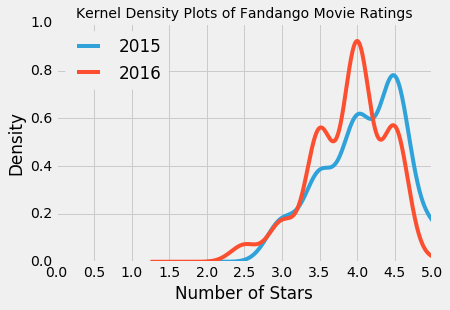

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
old_ratings_2015["Fandango_Stars"].plot.kde(label="2015",legend=True)
new_ratings_2016["fandango"].plot.kde(label="2016",legend=True)
plt.title("Kernel Density Plots of Fandango Movie Ratings",size=14)
plt.xlim((0,5))
plt.xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.xlabel("Number of Stars")
plt.ylabel("Density")

The distribution of movie ratings from 2015 is very left-skewed, with a peak at 4.5 stars, and the distribution of movie ratings from 2016 is also very left-skewed, with a peak at 4 stars. It does appear that the popular movies in 2016 generally have lower ratings than the popular movies in 2015.

## 5. Compare frequency distributions

In [39]:
# star ratings and percentages from 2015
old_ratings_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [40]:
# star rarings and percentages from 2016
new_ratings_2016["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

It is clear from the frequency tables that the 2015 ratings are higher than the 2016 ratings as well. In 2015, only about 26% of the movies had 3.5 stars or less, compared to 2016, where 34% of the movies had 3.5 stars or less. Additionally, in 2015, 45% of the movies had 4.5 or more stars, compared to in 2016, where only 25% of the movies had 4.5 or more stars. 

## 6. Compare summary statistics between the two distributions

In [60]:
# summary statistics for 2015
mean = old_ratings_2015["Fandango_Stars"].mean()
median = old_ratings_2015["Fandango_Stars"].median()
mode = old_ratings_2015["Fandango_Stars"].mode()[0]
stats_2015 = pd.Series([mean,median,mode])
print("2015 summary statistics")
print("mean = {:2.1f}".format(mean))
print("median = {:2.1f}".format(median))
print("mode = {:2.1f}".format(mode))

2015 summary statistics
mean = 4.1
median = 4.0
mode = 4.5


In [61]:
# summary statistics for 2016
mean = new_ratings_2016["fandango"].mean()
median = new_ratings_2016["fandango"].median()
mode = new_ratings_2016["fandango"].mode()[0]
stats_2016 = pd.Series([mean,median,mode])
print("2016 summary statistics")
print("mean = {:2.1f}".format(mean))
print("median = {:2.1f}".format(median))
print("mode = {:2.1f}".format(mode))

2016 summary statistics
mean = 3.9
median = 4.0
mode = 4.0


The movie ratings from 2016 have lower values for the mean (by 0.2 stars, or roughly 5%) and the mode (by 0.5 stars). The median values are the same for both years, but given the other summary statistics, these calculations again indicate that the movie ratings were higher in the 2015 movie sample compared to the 2016 movie sample.

In [87]:
stats = pd.concat([stats_2015,stats_2016],axis=1)
stats.columns = ["2015","2016"]
stats.index = ["mean","median","mode"]
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


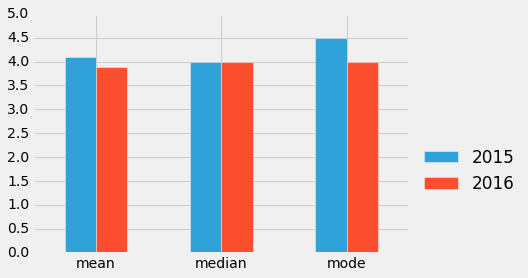

In [103]:
import numpy as np
stats.plot.bar(rot=0)
plt.ylim((0,5))
plt.yticks(np.arange(0,5.5,0.5))
plt.legend(loc='best',bbox_to_anchor=(1,0.5))

## 7. Conclusion

The original goal of this project was to analyze recent Fandango movie ratings to determine whether there has been any change in Fandango's rating system after Hickey's analysis. Throughout the analysis we realized that our before and after samples of movies may not be very comparable as they were selected based on different criteria and at different times. In particular, the movies from the 2016 dataset contained somewhat less popular movies (i.e. movies that had less than 30 fan ratings).  

Caveats aside though, we did find the general result that the sample of movies from 2016 appeared to have lower movie ratings than the movies sampled from 2015. This might indicate that Fandango tried to correct their star ranking methodology after inconsistencies and upward bias had been revealed through Hickey's 2015 analysis.